# Efecto de la ley de **Hoy No Circula** en México

Hoy No circula es un programa vehicular con el fin de reducir la contaminación atmosférica, aplicado en las delegaciones de la Ciudad de México y en 18 municipio del Estado de México. [SEDEMA](www.sedema.df.gob.mx.) 

En 2003 sólo se restringió la circulación al 7.6% de los vehículos capitalinos cada día de la semana, bajando desde el 20% propuesto originalmente. También quedaron exceptuados del programa los vehículos que consumen gas licuado de petróleo y aquellos destinados para emergencias. Al haber cumplido 8 años en servicio, cualquier vehículo del Distrito Federal debe observar las restricciones del Hoy no circula. Para saber si un vehículo está exento o no del programa, son adheridas en los cristales del mismo una calcomanía que los distingue. A partir del año 2008, se implementa también el “Hoy no circula sabatino”, debido a que los sábados se registraban IMECAS como cualquier otro día de la semana. Este programa sigue vigente en el 2011 para los vehículos de combustión interna que no porten el holograma de la verificación vehicular “Doble cero” y “cero”.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
registros_automoviles = pd.read_csv("../data/processed/registros_automaviles_anual_1997_2019.csv")
registros_automoviles.head()

,anio,id_entidad,id_municipio,auto_oficial,auto_publico,auto_particular,cam_pas_oficial,cam_pas_publico,cam_pas_particular,cyc_carga_oficial,cyc_carga_publico,cyc_carga_particular,moto_oficial,moto_de_alquiler,moto_particular,nom_entidad,nom_municipio
0,1984,1,1,1105,747,30263,33,516,71,948,590,18231,34,0,2032,Aguascalientes,Aguascalientes
1,1984,1,2,2,23,123,1,0,2,2,0,395,0,0,49,Aguascalientes,Asientos
2,1984,1,3,4,44,399,0,0,1,12,1,1155,0,0,45,Aguascalientes,Calvillo
3,1984,1,4,1,9,91,0,0,0,4,0,154,0,0,8,Aguascalientes,Cosío
4,1984,1,5,3,11,262,0,11,1,3,0,560,0,0,76,Aguascalientes,Jesús María


In [24]:
registros_automoviles.nom_entidad.unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de Mexico', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Mexico', 'Michoacan de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo Leon', 'Oaxaca', 'Puebla',
       'Queretaro', 'Quintana Roo', 'San Luis Potosi', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatan', 'Zacatecas'],
      dtype=object)

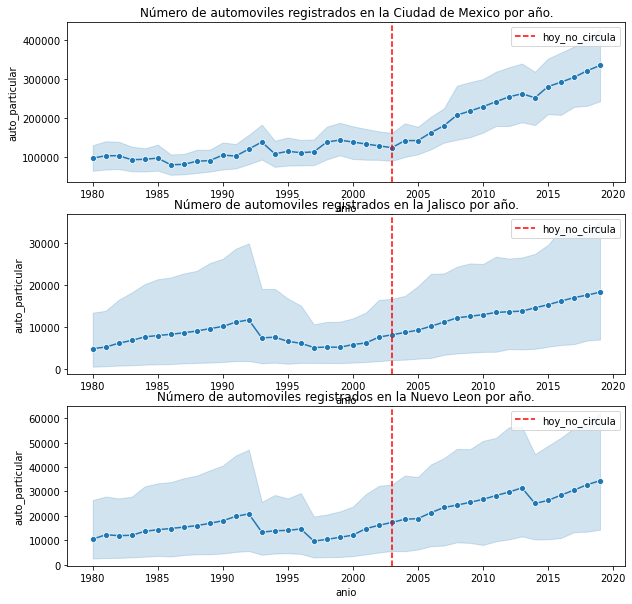

In [51]:
estados = ["Ciudad de Mexico", "Jalisco", "Nuevo Leon"]
fig, axs = plt.subplots(nrows=len(estados), figsize=(10,10))
for i in range(len(estados)):
    sns.lineplot(ax=axs[i], x="anio", y="auto_particular", data=registros_automoviles[registros_automoviles.nom_entidad==estados[i]],
        marker="o")
    axs[i].axvline(x=2003, linestyle="--", color="red", label="hoy_no_circula")
    axs[i].set_title("Número de automoviles registrados en la "+estados[i]+" por año.")
    axs[i].legend()
plt.show()

In [4]:
from causalimpact import CausalImpact

# Referencias:

- Wikipedia: [Hoy_No_Circula](https://es.wikipedia.org/wiki/Hoy_No_Circula)
- «SEDEMA - Objetivo y aplicación del programa Hoy No Circula». www.sedema.df.gob.mx. Archivado desde el original el 4 de abril de 2016. Consultado el 30 de marzo de 2016.
